In [4]:
#Importing the libraries
from tensorflow.keras import datasets
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten
import seaborn as sn

# Table Of Contents
1. [Loading the Data](#load)
2. [PLotting The Data](#plot)
3. [Pre-processing The Data](#pre)
4. [Architecture](#archi)
    a.[Model 0](#0)
    b.[Model 1](#1)
    c.[Model 2](#2)
5. [Saving The Model](#save)
6. [Loading The Model](#load)
7. [Predicting & Testing](#predict)
8. [Accuracy & Loss](#loss)
9. [Confusion Matrix](#cm)


In [20]:
#Knowing more about the datasets cifar10 
# datasets.cifar10.load_data??

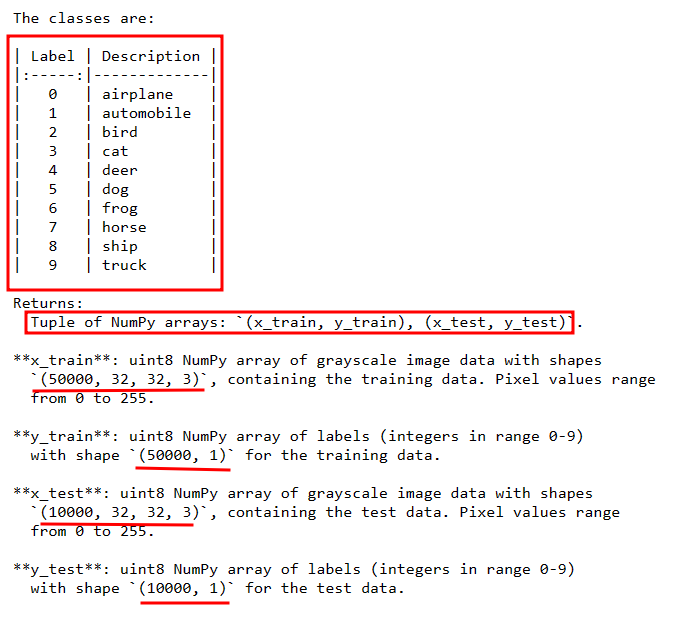
> Cifar10 is a dataset of 50,000 32x32 color training images and 10,000 test  images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html)

Turns out that the images are already splitted

# 1. Loading the Data <a name ="load"> </a>

In [5]:
#Loading The Data
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

# 2. Plotting the image <a name ="plot"></a>

There are 10 classes to be classified which are :

``` ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]```

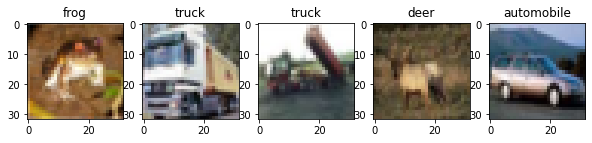

In [5]:

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
fig , ax = plt.subplots(ncols=5,figsize=(10,10))
for idx in range(5):
    ax[idx].imshow(X_train[idx])
    ax[idx].title.set_text(classes[y_train[idx][0]])

The pictures have really smaller pixels, just like Japanese Video 
😊

# 3. Pre-processing The Data <a name ="pre"></a>

In [6]:
y_train = y_train.reshape(-1,)
# y_train.shape

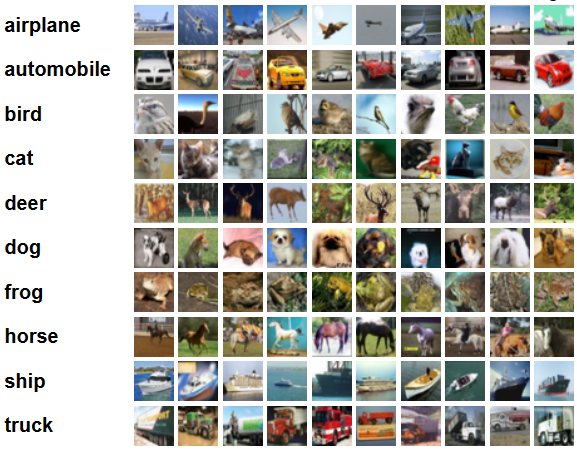

In [6]:
#Normalizing the image's shape by dividing the image by 255
X_train =X_train/255
X_test = X_test/255

## 4. Architecture <a name ="archi"></a>

This is the first model which has 
<ol>
    <li> Convolutional Layer with 16 filters of size (3,3)</li>
    <li> MaxPooling</li>
    <li> Convolution Layer with 32 filters of (3,3) size with stride = 1</li>
    <li> MaxPooling </li>
    <li> Flatten </li>
    <li> Fully Connected Layer with neurons =256 </li>
    <li> Final Output Layer with sigmoid activation </li>
        
</ol>

### a. Model 0 <a name ="0"></a>

In [92]:
model = Sequential()

In [93]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [94]:
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [96]:
hist = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0442 - accuracy: 0.6300
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9543 - accuracy: 0.6638
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8872 - accuracy: 0.6869
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8275 - accuracy: 0.7087
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7726 - accuracy: 0.7294
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7266 - accuracy: 0.7431
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6827 - accuracy: 0.7575
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6451 - accuracy: 0.7717
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6092 - accuracy: 0.7839
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - l

In [9]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 2, 2, 64)        

In [10]:
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 2, 2, 32)       

In [11]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 15, 15, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 2, 2, 32)       

In [102]:
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [128]:

np.argmax(y_pred[4]),y_test[4]


(6, array([6], dtype=uint8))

In [64]:
# Flatten??

In [97]:
def conv_model(model_name):
    model_name.add(Conv2D(8, (3,3), 1, activation='relu', input_shape=(32,32,3)))
    model_name.add(MaxPooling2D())
    model_name.add(Conv2D(16,(3,3),1,activation='relu'))
    model_name.add(MaxPooling2D())
    model_name.add(Conv2D(32,(3,3),1,activation='relu'))
    model_name.add(MaxPooling2D())
    model_name.add(Flatten())
    model_name.add(Dense(3000,activation='relu'))
    model_name.add(Dense(1000,activation='relu'))
    model_name.add(Dense(10,activation='softmax'))

This is the second and third model which has 
<ol>
    <li> Convolutional Layer with 8 filters of size (3,3)</li>
    <li> MaxPooling</li>
    <li> Convolution Layer with 16 filters of (3,3) size with stride = 1</li>
    <li> MaxPooling </li>
    <li> Convolution Layer with 32 filters of (3,3) size with stride = 1</li>
    <li> MaxPooling </li>
    <li> Flatten </li>
    <li> Fully Connected Layer with neurons =3000 </li>
    <li> Fully Connected Layer with neurons =1000 </li>
    <li> Final Output Layer with softmax activation </li>
        
</ol>

Model 1 has **adam** optimizer and model 2 has **SGD** optimizer

### b. Model 1 <a name ="1"></a>

In [133]:
model1 = Sequential()
conv_model(model1)
model1.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [134]:
hist1 = model1.fit(X_train,y_train,epochs =10)

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5869 - accuracy: 0.4141
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.2965 - accuracy: 0.5345
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1620 - accuracy: 0.5866
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0637 - accuracy: 0.6227
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9781 - accuracy: 0.6527
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8985 - accuracy: 0.6791
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8177 - accuracy: 0.7085
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7417 - accuracy: 0.7326
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6583 - accuracy: 0.7599
Epoch 10/10
1563/1563 [==============================] - 35s 22m

### c. Model 2 <a name ="2"></a>

In [135]:
model2 = Sequential()
conv_model(model2)
model2.compile('SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist2 = model2.fit(X_train,y_train,epochs =10)

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 2.1324 - accuracy: 0.2163
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.7671 - accuracy: 0.3622
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5924 - accuracy: 0.4252
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4976 - accuracy: 0.4637
Epoch 5/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.4285 - accuracy: 0.4891
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3682 - accuracy: 0.5144
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3193 - accuracy: 0.5318
Epoch 8/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.2756 - accuracy: 0.5493
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2314 - accuracy: 0.5670
Epoch 10/10
1563/1563 [==============================] - 30s 19m

# 5. Saving The Model <a name ="save"></a>

In [137]:
model.save(os.path.join('models','model.h5'))
model1.save(os.path.join('models','model1.h5'))
model2.save(os.path.join('models','model2.h5'))


# 6. Loading The Model <a name ="load"></a>

In [8]:
from tensorflow.keras.models import load_model
model = load_model(os.path.join('models','model.h5'))
model1 = load_model(os.path.join('models','model1.h5'))
model2 = load_model(os.path.join('models','model2.h5'))


# 7. Predicting & Testing The Model <a name ="predict"></a>

In [12]:
y_pred_0 = model.predict(X_test)
y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [194]:
np.argmax(y_test_0[1])

1

In [195]:
y_pred_0 = [np.argmax(element) for element in y_pred_0]


[5,
 1,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 4,
 9,
 5,
 7,
 1,
 4,
 5,
 7,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 2,
 3,
 0,
 1,
 6,
 6,
 5,
 4,
 5,
 9,
 8,
 7,
 9,
 9,
 5,
 4,
 6,
 5,
 6,
 8,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 2,
 3,
 8,
 8,
 3,
 5,
 4,
 3,
 7,
 5,
 6,
 9,
 6,
 2,
 8,
 2,
 4,
 9,
 2,
 6,
 8,
 8,
 0,
 2,
 7,
 3,
 5,
 8,
 8,
 9,
 1,
 7,
 2,
 7,
 4,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 3,
 6,
 0,
 0,
 7,
 4,
 4,
 6,
 3,
 1,
 1,
 5,
 6,
 8,
 5,
 6,
 0,
 6,
 2,
 9,
 7,
 0,
 4,
 6,
 7,
 8,
 7,
 1,
 2,
 8,
 9,
 8,
 3,
 6,
 6,
 4,
 1,
 8,
 9,
 1,
 3,
 9,
 7,
 2,
 8,
 6,
 5,
 3,
 3,
 8,
 2,
 6,
 6,
 7,
 7,
 8,
 9,
 6,
 1,
 0,
 3,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 6,
 7,
 0,
 9,
 9,
 9,
 7,
 9,
 9,
 3,
 7,
 5,
 9,
 0,
 5,
 6,
 4,
 3,
 8,
 6,
 2,
 3,
 8,
 6,
 8,
 0,
 1,
 7,
 3,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 5,
 9,
 5,
 7,
 8,
 7,
 7,
 9,
 8,
 4,
 7,
 3,
 9,
 7,
 3,
 9,
 6,
 4,
 3,
 6,
 5,
 9,
 5,
 8,
 8,
 0,
 4,
 0,
 6,
 5,
 1,
 9,
 8,
 9,
 0,
 6,
 1,
 8,
 7,
 0,


In [196]:
y_pred_1 = [np.argmax(element) for element in y_pred_1]
y_pred_2 = [np.argmax(element) for element in y_pred_2]



In [204]:
y_pred_0[0],classes[5]

(5, 'dog')

In [205]:
def check(i,model):
    if model == 0:
        print("Model 0 predicted",classes[y_pred_0[i]])
        
    elif model == 1:
        
        print("Model 1 predicted",classes[y_pred_1[i]])
        
    else:
        print("Model 2 predicted",classes[y_pred_2[i]])
        

Actual image is  airplane 742 index


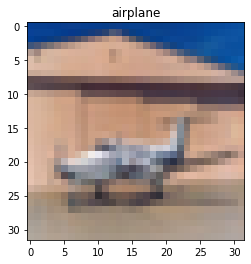

Model 0 predicted airplane
Model 1 predicted airplane
Model 2 predicted truck
********
Actual image is  airplane 180 index


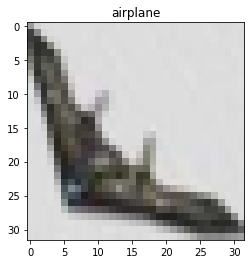

Model 0 predicted airplane
Model 1 predicted airplane
Model 2 predicted airplane
********
Actual image is  cat 715 index


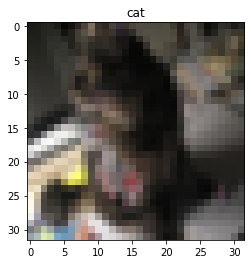

Model 0 predicted cat
Model 1 predicted bird
Model 2 predicted horse
********
Actual image is  frog 379 index


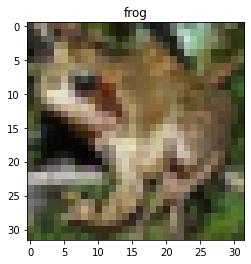

Model 0 predicted frog
Model 1 predicted frog
Model 2 predicted frog
********
Actual image is  bird 731 index


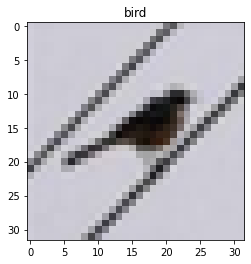

Model 0 predicted airplane
Model 1 predicted bird
Model 2 predicted bird
********
Actual image is  frog 994 index


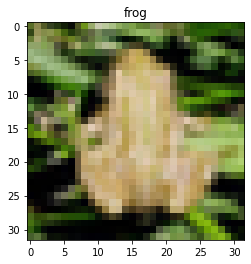

Model 0 predicted frog
Model 1 predicted frog
Model 2 predicted frog
********
Actual image is  automobile 81 index


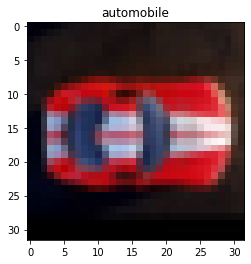

Model 0 predicted truck
Model 1 predicted automobile
Model 2 predicted automobile
********
Actual image is  dog 444 index


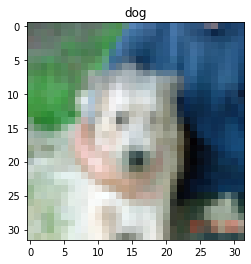

Model 0 predicted dog
Model 1 predicted dog
Model 2 predicted horse
********
Actual image is  truck 609 index


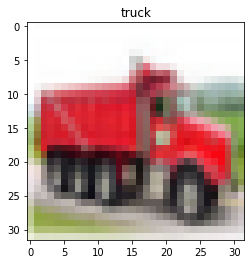

Model 0 predicted truck
Model 1 predicted truck
Model 2 predicted truck
********
Actual image is  bird 160 index


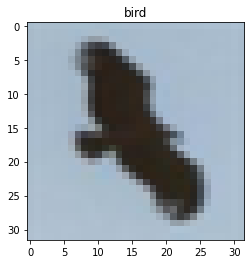

Model 0 predicted bird
Model 1 predicted bird
Model 2 predicted airplane
********


In [254]:
for n in range(10):
    i=random.randint(0,1000)
#     ax[n].imshow(X_test[i])
#     ax[n].title.set_text(classes[y_test[i][0]])
    print("Actual image is ",classes[y_test[i][0]],i,"index")
    plt.imshow(X_test[i])
    plt.title(classes[y_test[i][0]])
    plt.show()
    check(i,0),check(i,1),check(i,2)
    print("********")

# 8. Accuracy & Loss curve <a name ="losss"></a>

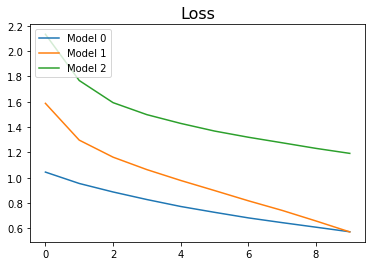

In [203]:
plt.plot(hist.history["loss"],label="Model 0")
plt.plot(hist1.history["loss"],label="Model 1")
plt.plot(hist2.history["loss"],label="Model 2")
plt.legend(loc='upper left')
plt.title("Loss",fontsize=16)
plt.show()

In [12]:
plt.plot(hist.history["accuracy"],label="Model 0")
plt.plot(hist1.history["accuracy"],label="Model 1")
plt.plot(hist2.history["accuracy"],label="Model 2")
plt.legend(loc='upper left')
plt.title("Accuracy",fontsize=16)
plt.show()

NameError: name 'hist' is not defined

The model 0 turns out to be best 

# 9. Confusion Matrix <a name ="cm"></a>

In [214]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report For Model 0: \n", classification_report(y_test, y_pred_0))
print("Classification Report For Model 1: \n", classification_report(y_test, y_pred_1))
print("Classification Report For Model 2: \n", classification_report(y_test, y_pred_2))


Classification Report For Model 0: 
               precision    recall  f1-score   support

           0       0.78      0.68      0.73      1000
           1       0.84      0.79      0.82      1000
           2       0.65      0.48      0.56      1000
           3       0.56      0.48      0.52      1000
           4       0.64      0.62      0.63      1000
           5       0.61      0.58      0.59      1000
           6       0.65      0.85      0.74      1000
           7       0.66      0.80      0.72      1000
           8       0.78      0.80      0.79      1000
           9       0.74      0.82      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

Classification Report For Model 1: 
               precision    recall  f1-score   support

           0       0.58      0.81      0.68      1000
           1       0.80      0.74      0.77      1000
    

In [217]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9662 - accuracy: 0.6911


[0.9661680459976196, 0.691100001335144]

In [218]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.1950 - accuracy: 0.6353


[1.1949656009674072, 0.6352999806404114]

In [255]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.3398 - accuracy: 0.5342


[1.3398326635360718, 0.5342000126838684]

In [22]:
y_pred_classes_0 = [np.argmax(element) for element in y_pred_0]
y_pred_classes_1 = [np.argmax(element) for element in y_pred_1]
y_pred_classes_2 = [np.argmax(element) for element in y_pred_2]

cm_0 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_0)
cm_1 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_2)
cm_2 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_1)


In [27]:
def confusion_matrix(model):
    plt.figure(figsize = (10,7))
    if (model == 0):
        sn.heatmap(cm_0, annot=True, fmt='d')
    elif (model == 1):
        sn.heatmap(cm_1, annot=True, fmt='d')
    else:
        sn.heatmap(cm_2, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Model'+ str(model))
    plt.show()

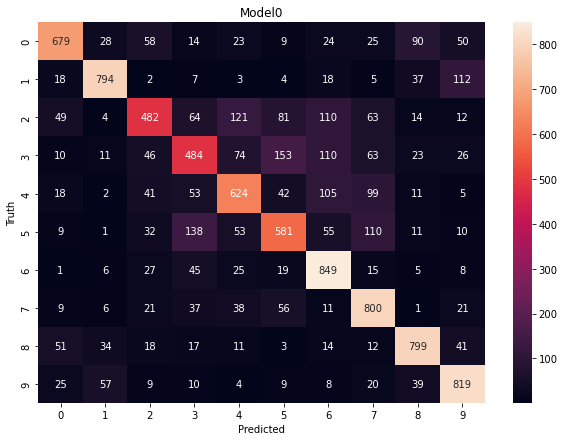

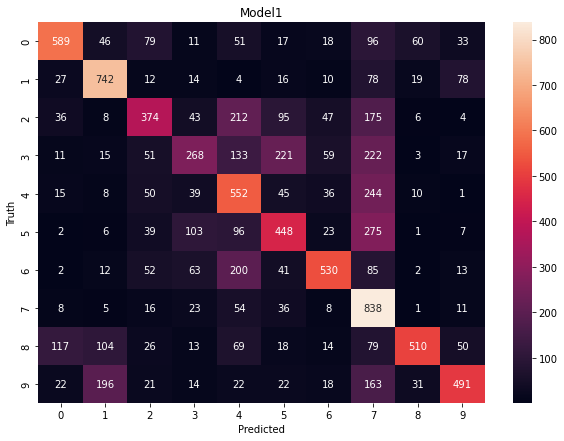

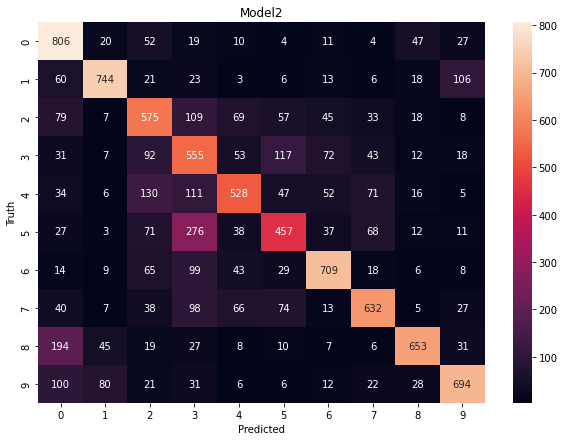

In [30]:
confusion_matrix(0)
confusion_matrix(1)
confusion_matrix(2)